**Imports**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

**Define Paths (Train-Valid-Test)**

In [58]:
train_dir = 'BDT_v1/train'
valid_dir = 'BDT_v1/valid'
test_dir = 'BDT_v1/test'

**Image Parameters**

In [59]:
img_height, img_width = 224, 224
batch_size = 32

**Data Generators**

In [60]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

Found 3144 images belonging to 4 classes.


In [6]:
valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 672 images belonging to 4 classes.


In [7]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical',
    shuffle=False
)

Found 684 images belonging to 4 classes.


**Number of Classes**

In [61]:
num_classes = len(train_generator.class_indices)
print(f"Number of classes: {num_classes}")
print(f"Class indices: {train_generator.class_indices}")

Number of classes: 4
Class indices: {'1000_BDT': 0, '100_BDT': 1, '200_BDT': 2, '500_BDT': 3}


**Build CNN Model**

In [62]:
def build_cnn_model(input_shape=(224, 224, 3), num_classes=num_classes):
    model = models.Sequential([
        
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        layers.Conv2D(256, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.BatchNormalization(),
        
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(num_classes, activation='softmax')
    ])
    
    return model

**Compile Model**

In [63]:
model = build_cnn_model()
model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 111, 111, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 54, 54, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 12, 12, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 36864)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │    18,874,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,397,572 (74.00 MB)

 Trainable params: 19,396,612 (73.99 MB)

 Non-trainable params: 960 (3.75 KB)

**Model Train**

In [11]:
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=valid_generator,
    verbose=1
)

Epoch 1/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 135s 1s/step - accuracy: 0.7042 - loss: 4.4780 - val_accuracy: 0.3824 - val_loss: 5.1590
Epoch 2/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 120s 1s/step - accuracy: 0.8333 - loss: 2.3014 - val_accuracy: 0.3884 - val_loss: 6.0188
Epoch 3/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 114s 1s/step - accuracy: 0.8785 - loss: 1.1017 - val_accuracy: 0.3929 - val_loss: 3.9548
Epoch 4/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 110s 1s/step - accuracy: 0.9211 - loss: 0.6661 - val_accuracy: 0.6116 - val_loss: 2.0824
Epoch 5/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 112s 1s/step - accuracy: 0.9373 - loss: 0.4087 - val_accuracy: 0.7217 - val_loss: 1.6936
Epoch 6/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9338 - loss: 0.5159 - val_accuracy: 0.6384 - val_loss: 3.6891
Epoch 7/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 123s 1s/step - accuracy: 0.9466 - loss: 0.2802 - val_accuracy: 0.5372 - val_loss: 18.2148
Epoch 8/50
99/99 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.9478 - loss: 0.2277 - val_accuracy: 0.4062 - 

**Save Model**

In [12]:
model.save('bdt_cnn_model.h5')

In [14]:
#model.save('bdt_cnn.keras')

**Training History Plot**

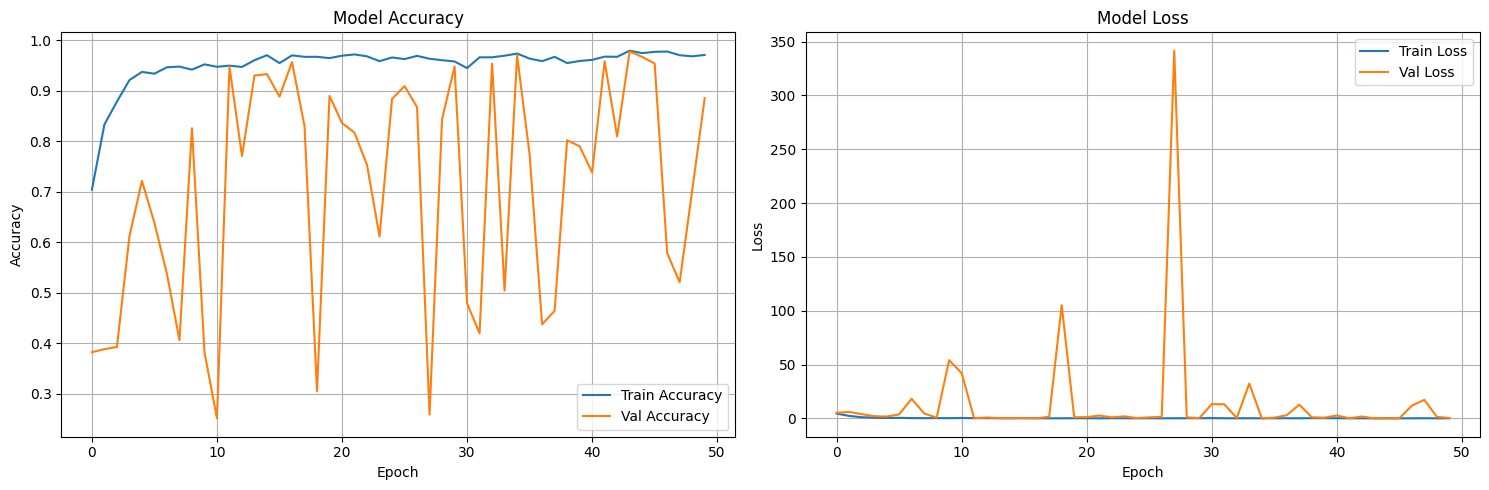

In [64]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Val Accuracy')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Val Loss')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.savefig('training_history.png')
    plt.show()

plot_training_history(history)

**Test Set Evaluation**

In [77]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")

684/684 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8480 - loss: 0.6714

Test Accuracy: 84.80%
Test Loss: 0.6714


**Get Predictions**

In [78]:
test_generator.reset()
predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

684/684 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step


**Get Class Names**

In [79]:
class_names = list(test_generator.class_indices.keys())
class_names_sorted = [None] * len(class_names)
for name, idx in test_generator.class_indices.items():
    class_names_sorted[idx] = name

**Visualize Predictions with True and Predictions Labels**

In [75]:
def visualize_predictions(generator, predictions, num_images=12):

    generator.reset()
    
    fig = plt.figure(figsize=(20, 15))
    cols = 4
    rows = (num_images + cols - 1) // cols
    
    for i in range(min(num_images, len(predictions))):
        
        img_batch, label_batch = next(generator)
        img = img_batch[0]
        
        true_class_idx = true_classes[i]
        pred_class_idx = predicted_classes[i]
        
        true_label = class_names_sorted[true_class_idx]
        pred_label = class_names_sorted[pred_class_idx]
        
        
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.imshow(img)
        ax.axis('off')
        
        
        title = f"True: {true_label}\nPred: {pred_label}"
        color = 'green' if true_class_idx == pred_class_idx else 'red'
        ax.set_title(title, fontsize=12, color=color, weight='bold')
    
    plt.tight_layout()
    plt.savefig('Predictions_Visualization.png', dpi=150, bbox_inches='tight')
    plt.show()

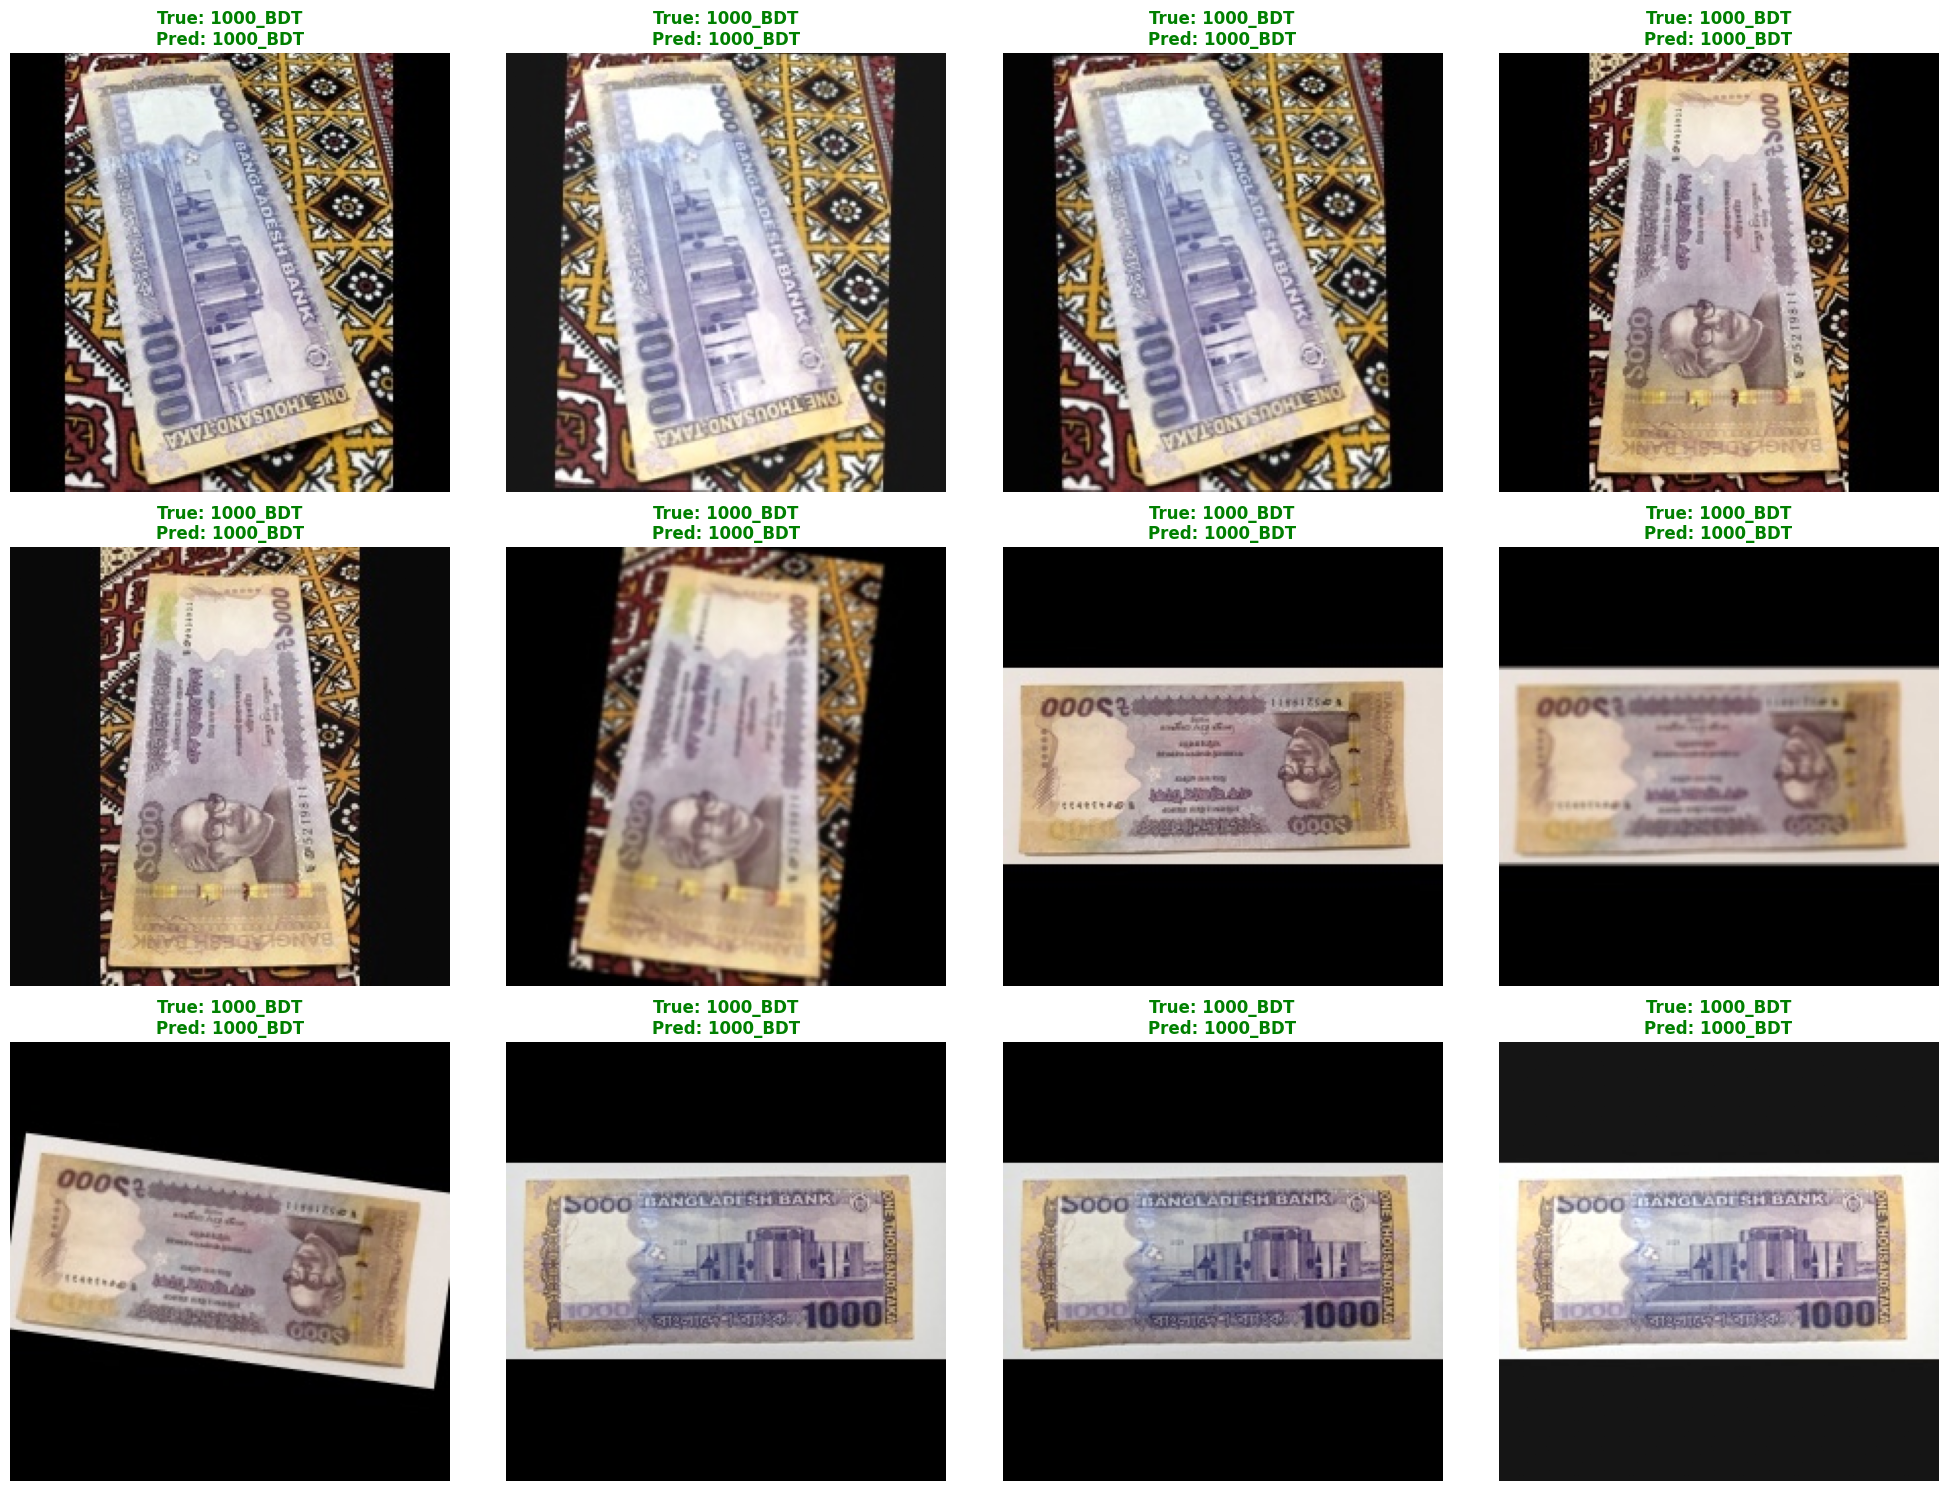

In [76]:
visualize_predictions(test_generator, predictions, num_images=12)

**Confusion Matrix**

In [73]:
def plot_confusion_matrix(true_classes, predicted_classes, class_names):
    cm = confusion_matrix(true_classes, predicted_classes)
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names,
                yticklabels=class_names)
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png', dpi=150)
    plt.show()

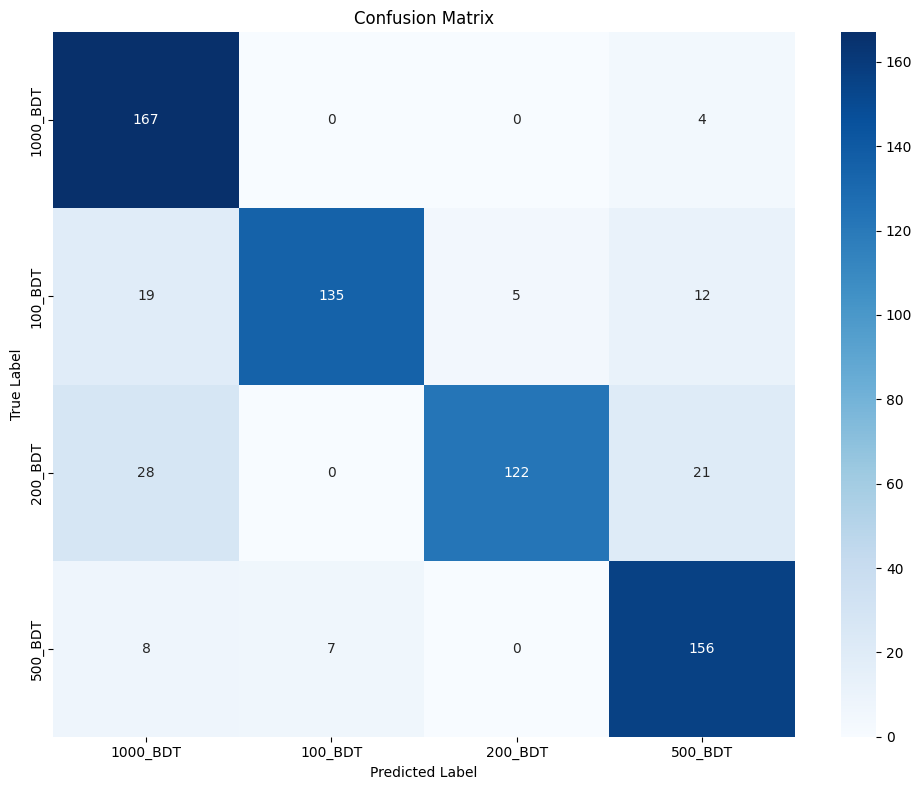

In [74]:
plot_confusion_matrix(true_classes, predicted_classes, class_names_sorted)

**Classification Report**

In [72]:
print("\nClassification Report:")
print(classification_report(true_classes, predicted_classes, 
                           target_names=class_names_sorted))


Classification Report:
              precision    recall  f1-score   support

    1000_BDT       0.75      0.98      0.85       171
     100_BDT       0.95      0.79      0.86       171
     200_BDT       0.96      0.71      0.82       171
     500_BDT       0.81      0.91      0.86       171

    accuracy                           0.85       684
   macro avg       0.87      0.85      0.85       684
weighted avg       0.87      0.85      0.85       684



**Per-Class Accuracy**

In [71]:
def calculate_per_class_accuracy(true_classes, predicted_classes, class_names):
    print("\nPer-Class Accuracy:")
    print("-" * 40)
    for i, class_name in enumerate(class_names):
        class_mask = true_classes == i
        class_correct = np.sum((true_classes[class_mask] == predicted_classes[class_mask]))
        class_total = np.sum(class_mask)
        class_acc = (class_correct / class_total * 100) if class_total > 0 else 0
        print(f"{class_name}: {class_acc:.2f}% ({class_correct}/{class_total})")

calculate_per_class_accuracy(true_classes, predicted_classes, class_names_sorted)


Per-Class Accuracy:
----------------------------------------
1000_BDT: 97.66% (167/171)
100_BDT: 78.95% (135/171)
200_BDT: 71.35% (122/171)
500_BDT: 91.23% (156/171)


**Testing with New Data**

In [66]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [67]:
model = load_model('bdt_cnn_model.h5')

In [68]:
class_labels = {
    0: '1000_BDT',
    1: '100_BDT', 
    2: '200_BDT',
    3: '500_BDT'
}

**Result with Visualization**

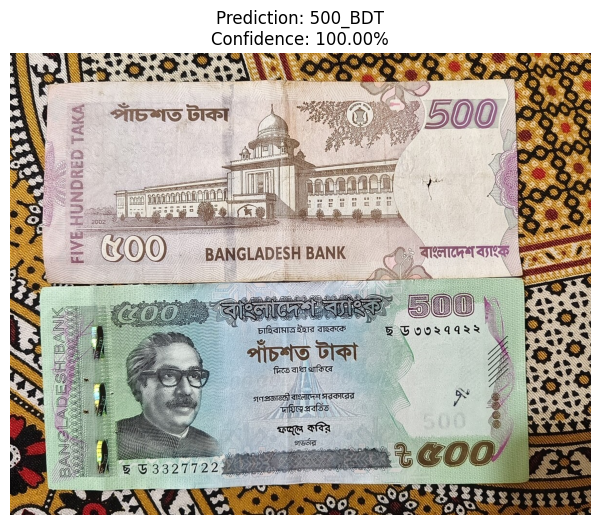

Predicted Class: 500_BDT
Confidence: 100.00%


In [85]:
def predict_and_show(image_path):

    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Cannot read image from {image_path}")
        return

    display_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img = cv2.resize(img, (224, 224))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)

    prediction = model.predict(img, verbose=0)[0]
    class_idx = np.argmax(prediction)
    confidence = prediction[class_idx] * 100
    predicted_class = class_labels[class_idx]

    plt.figure(figsize=(8, 6))
    plt.imshow(display_img)
    plt.title(f"Prediction: {predicted_class}\nConfidence: {confidence:.2f}%")
    plt.axis('off')
    plt.show()
    
    return predicted_class, confidence


image_path = "BDT.jpg"
result = predict_and_show(image_path)
if result:
    print(f"Predicted Class: {result[0]}")
    print(f"Confidence: {result[1]:.2f}%")